In [3]:
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv("./compare/score.csv")

algos = set(data.algo)
for algo in algos:
    for dataset in set(data.dataset):
        csv_algo_dataset = data[(data['dataset'] == dataset) & (data['algo'] == algo)][["acc","k_fold"]]
        if csv_algo_dataset.empty:
            continue
        kfold, accs = zip(*[(i,v.acc.mean()) for i,v in csv_algo_dataset.groupby("k_fold")])
        plt.scatter(kfold, accs, label=dataset)

    plt.title(algo)
    plt.xlabel("k-fold")
    plt.ylabel("acc")
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left', borderaxespad=0)
    plt.savefig("graphs/"+algo, bbox_inches='tight')
    plt.close()


In [19]:
data[(data['algo'] == "mi-Net")]

,algo,k_fold,time_running,time,acc,dataset,pc,-1_precision,-1_recall,-1_f1-score,...,1_f1-score,1_support,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support
1502,mi-Net,1,1671724609,146.938823,0.650000,musk1,DESKTOP-KB1MVGV,0.850000,0.607143,0.708333,...,0.562500,12.0,0.650000,0.678571,0.635417,40.0,0.730000,0.650000,0.664583,40.0
1503,mi-Net,1,1671725168,59.800004,0.575000,musk1,DESKTOP-KB1MVGV,0.950000,0.542857,0.690909,...,0.320000,5.0,0.575000,0.671429,0.505455,40.0,0.856250,0.575000,0.644545,40.0
1504,mi-Net,2,1671725222,52.950916,0.500000,musk1,DESKTOP-KB1MVGV,0.650000,0.500000,0.565217,...,0.411765,14.0,0.500000,0.500000,0.488491,40.0,0.545000,0.500000,0.511509,40.0
1505,mi-Net,3,1671725276,54.152966,0.500000,musk1,DESKTOP-KB1MVGV,0.850000,0.500000,0.629630,...,0.230769,6.0,0.500000,0.500000,0.430199,40.0,0.745000,0.500000,0.569801,40.0
1506,mi-Net,4,1671725330,52.579548,0.500000,musk1,DESKTOP-KB1MVGV,0.450000,0.500000,0.473684,...,0.523810,22.0,0.500000,0.500000,0.498747,40.0,0.505000,0.500000,0.501253,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,mi-Net,1,1671737233,26.005031,0.947368,musk1,DESKTOP-KB1MVGV,0.888889,1.000000,0.941176,...,0.952381,11.0,0.944444,0.954545,0.946779,19.0,0.953216,0.947368,0.947663,19.0
1724,mi-Net,2,1671737260,25.618954,0.789474,musk1,DESKTOP-KB1MVGV,0.888889,0.727273,0.800000,...,0.777778,8.0,0.794444,0.801136,0.788889,19.0,0.809357,0.789474,0.790643,19.0
1725,mi-Net,3,1671737286,25.550898,0.888889,musk1,DESKTOP-KB1MVGV,0.888889,0.888889,0.888889,...,0.888889,9.0,0.888889,0.888889,0.888889,18.0,0.888889,0.888889,0.888889,18.0
1726,mi-Net,4,1671737312,25.823276,0.944444,musk1,DESKTOP-KB1MVGV,0.888889,1.000000,0.941176,...,0.947368,10.0,0.944444,0.950000,0.944272,18.0,0.950617,0.944444,0.944616,18.0


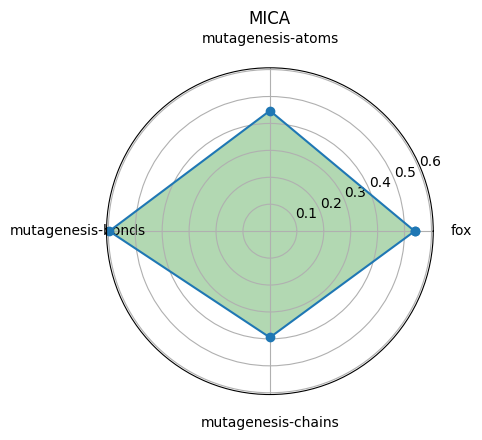

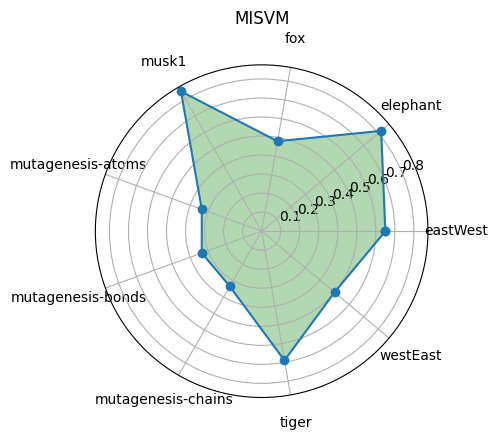

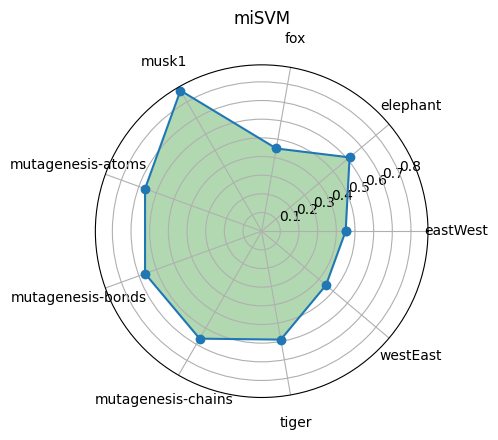

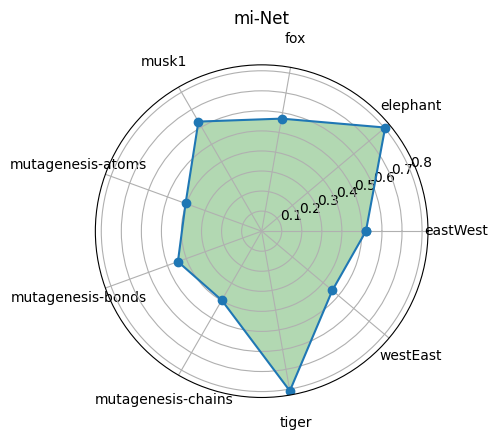

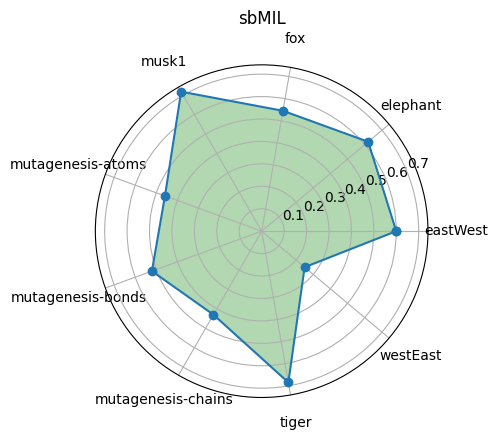

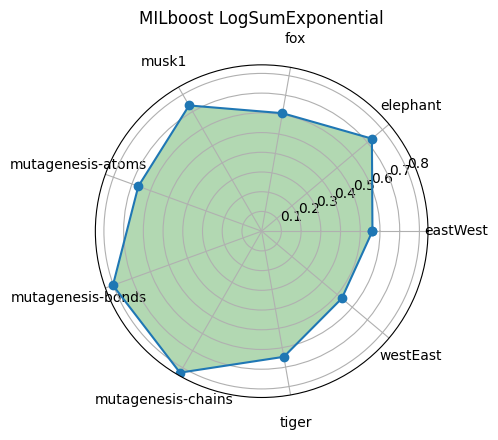

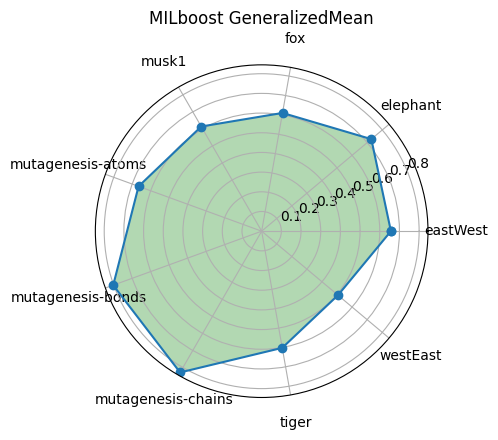

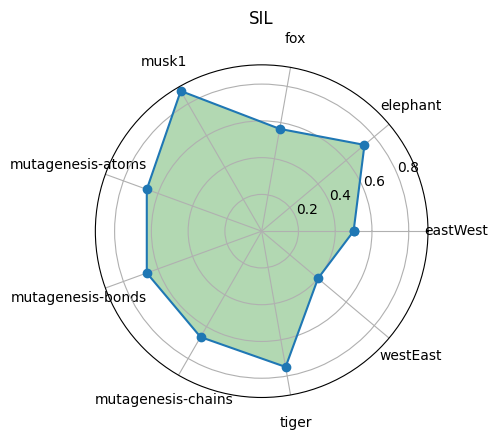

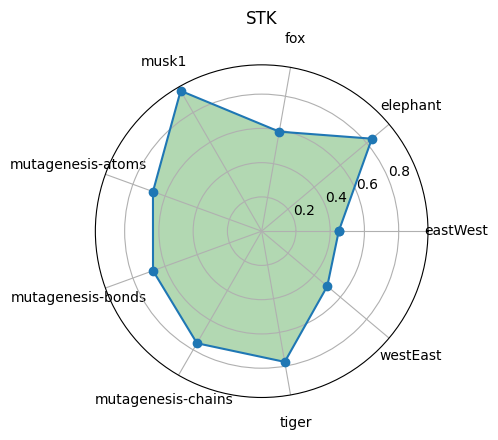

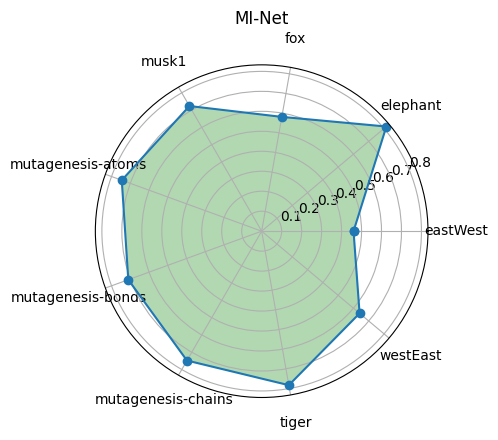

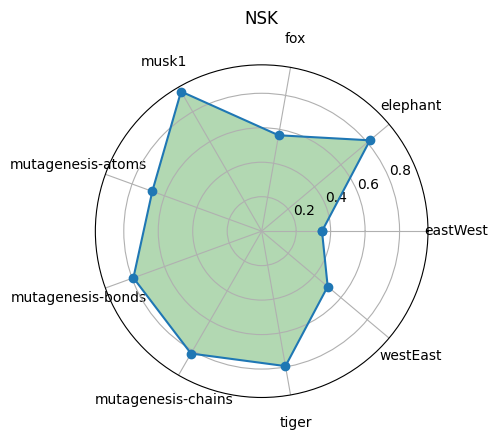

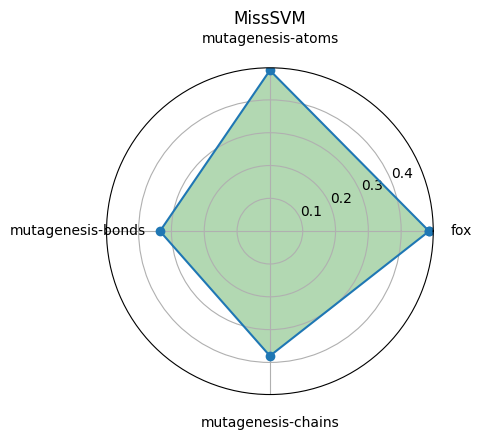

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for algo in set(data.algo):
    plt.rcParams["figure.figsize"] = [8.50, 4.50]
    plt.rcParams["figure.autolayout"] = True

    val = [v.acc.mean() for i, v in data[data.algo == algo].groupby("dataset")]
    l = [i for i, v in data[data.algo == algo].groupby("dataset")]

    df = pd.DataFrame({'sports': l, 'values': val})

    fig = plt.figure()

    ax = fig.add_subplot(111, projection="polar")

    theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi

    values = df['values'].values
    values = np.append(values, values[0])


    l1, = ax.plot(theta, values, marker="o", label=l)

    ax.tick_params(pad=10)
    ax.fill(theta, values, 'green', alpha=0.3)
    ax.set_thetagrids(theta[:-1] * 180/np.pi, l)
    plt.title(algo)
    plt.savefig("graphs/"+algo+".png")
    plt.show()

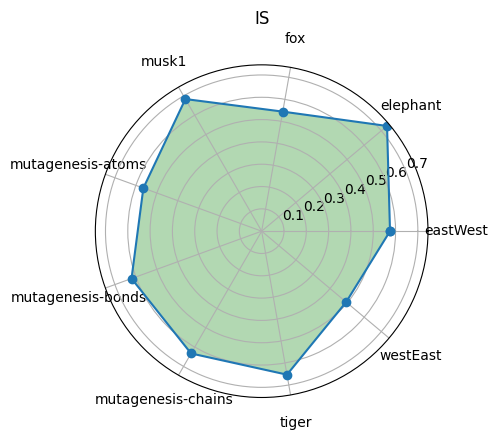

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True

val = [v.acc.mean() for i, v in data[(data.algo == "MissSVM") | (data.algo == "miSVM") | (data.algo == "MISVM") | (data.algo == "MILboost GeneralizedMean") | (data.algo == "MILboost LogSumExponential") | (data.algo == "mi-Net") | (data.algo == "MICA")].groupby("dataset")]
l = [i for i, v in data[(data.algo == "MissSVM") | (data.algo == "miSVM") | (data.algo == "MISVM") | (data.algo == "MILboost GeneralizedMean") | (data.algo == "MILboost LogSumExponential") | (data.algo == "mi-Net") | (data.algo == "MICA")].groupby("dataset")]

df = pd.DataFrame({'sports': l, 'values': val})

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi

values = df['values'].values
values = np.append(values, values[0])


l1, = ax.plot(theta, values, marker="o", label=l)

ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.3)
ax.set_thetagrids(theta[:-1] * 180/np.pi, l)
plt.title("IS")
plt.savefig("graphs/IS.png")
plt.show()

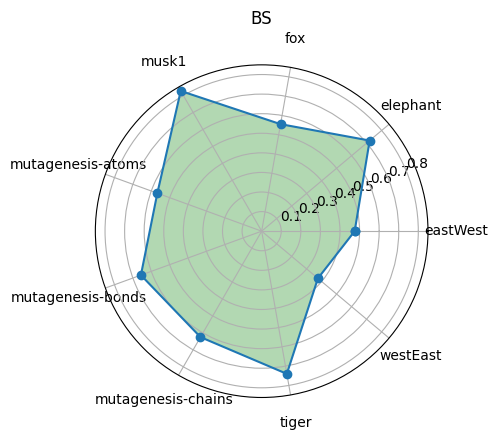

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True

val = [v.acc.mean() for i, v in data[(data.algo == "sbMIL") | (data.algo == "NSK")].groupby("dataset")]
l = [i for i, v in data[(data.algo == "sbMIL") | (data.algo == "NSK")].groupby("dataset")]

df = pd.DataFrame({'sports': l, 'values': val})

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi

values = df['values'].values
values = np.append(values, values[0])


l1, = ax.plot(theta, values, marker="o", label=l)

ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.3)
ax.set_thetagrids(theta[:-1] * 180/np.pi, l)
plt.title("BS")
plt.savefig("graphs/BS.png")
plt.show()

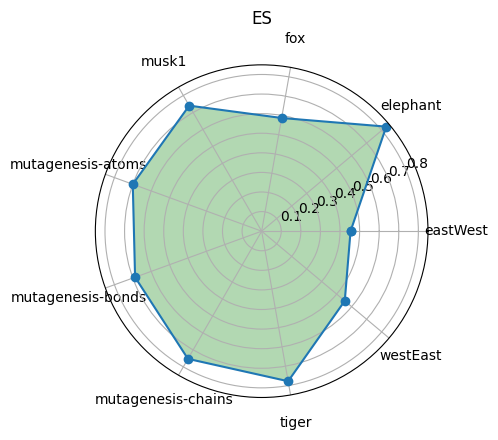

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True

val = [v.acc.mean() for i, v in data[(data.algo == "MI-Net") | (data.algo == "STK")].groupby("dataset")]
l = [i for i, v in data[(data.algo == "MI-Net") | (data.algo == "STK")].groupby("dataset")]

df = pd.DataFrame({'sports': l, 'values': val})

fig = plt.figure()

ax = fig.add_subplot(111, projection="polar")

theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi

values = df['values'].values
values = np.append(values, values[0])


l1, = ax.plot(theta, values, marker="o", label=l)

ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.3)
ax.set_thetagrids(theta[:-1] * 180/np.pi, l)
plt.title("ES")
plt.savefig("graphs/ES.png")
plt.show()